# ADS-DV Week 2 Assignment 5

# Recreating a multiple line graph

## Summary
This assignment lets you dive deep into paying attention to details in a plot by recreating someone else's data visualization.

## Recreating a plot
You are going to recreate the first plot in the following article about tall Dutch people:

http://www.randalolson.com/2014/06/23/why-the-dutch-are-so-tall/

To help you on your way, we download the dataset first and clean it by interpolating missing data, see also http://pandas.pydata.org/pandas-docs/stable/missing_data.html.

The color series used in the plot is taken from the default Tableau color scheme. In the following blogpost you can read how you can use it in your plots: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/. It also helps you with adding the Country annotations.

Try to reproduce the plot as closely as possible. Good luck!!

Do you agree with the conclusions from the article?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heights = pd.read_csv('http://files.figshare.com/1545826/world_heights.csv')
heights_cleaned = heights.interpolate()

print(heights_cleaned)

     Year  The Netherlands       Italy      France      Sweden  U.S.A.  \
0    1818       163.790000         NaN         NaN         NaN     NaN   
1    1819       164.460000         NaN         NaN         NaN     NaN   
2    1820       164.720000         NaN         NaN         NaN  173.00   
3    1821       164.710000         NaN         NaN         NaN  173.05   
4    1822       164.810000         NaN         NaN         NaN  173.10   
5    1823       165.090000         NaN         NaN         NaN  173.15   
6    1824       165.400000         NaN         NaN         NaN  173.20   
7    1825       165.700000         NaN         NaN         NaN  173.25   
8    1826       166.180000         NaN         NaN         NaN  173.30   
9    1827       166.350000         NaN         NaN         NaN  173.35   
10   1828       166.150000         NaN         NaN         NaN  173.40   
11   1829       166.180000         NaN         NaN         NaN  173.45   
12   1830       166.550000         NaN

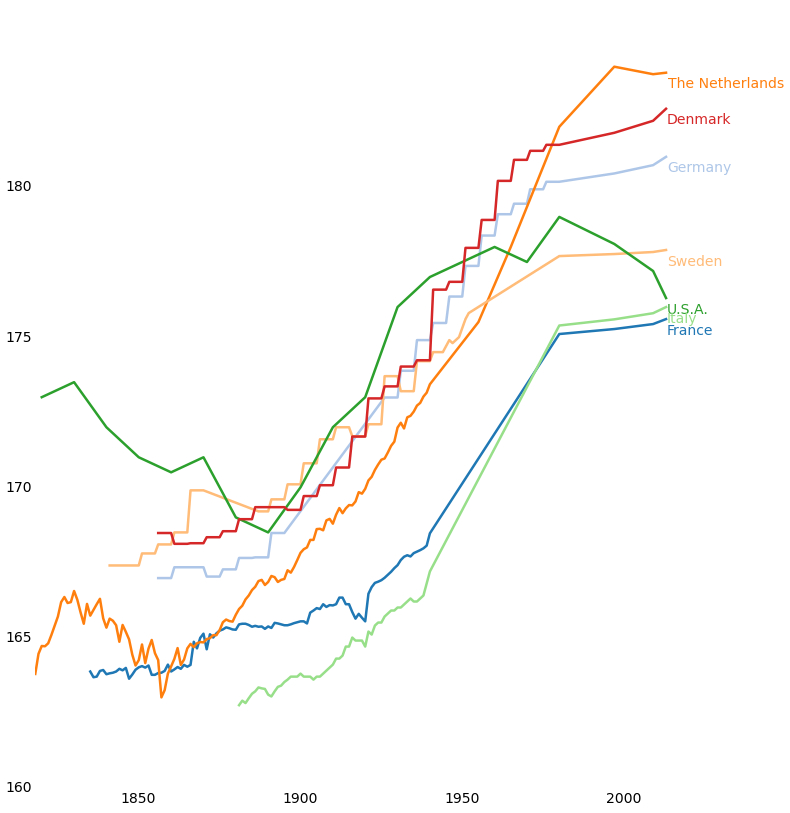

In [18]:
import matplotlib.pyplot as plt

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

plt.figure(figsize=(12, 14)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.ylim(160, 186)    
plt.xlim(1818, 2025)   

plt.yticks(range(160, 185, 5), [str(x) for x in range(160, 185, 5)], fontsize=14)    
plt.xticks(fontsize=14)   

for y in range(10, 91, 10):    
    plt.plot(range(1818, 2025), [y] * len(range(1818, 2025)), "--", lw=0.5, color="black", alpha=0.3)    

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on") 

countries = ['France','Germany','The Netherlands','Sweden','U.S.A.','Italy','Denmark']

for rank, column in enumerate(countries):       
    plt.plot(heights_cleaned.Year.values,heights_cleaned[column.replace("\n", " ")].values,lw=2.5, color=tableau20[rank])
    y_pos = heights_cleaned[column.replace("\n", " ")].values[-1] - 0.5  
    plt.text(2013.5, y_pos, column, fontsize=14, color=tableau20[rank]) 